In [2]:
import numpy as np
from hydrogen_calculations import (get_xyz_arrays, get_trig_arrays,
                                   hydrogen_wavefunction_cartesian,
                                   complex_array_to_rgb, get_dx,
                                   array_prob_enclosed_to_prob_value,
                                   array_prob_enclosed_to_psi_squared_value)
import time
import pyvista as pv
from pathlib import Path

pv.set_plot_theme("document")


In [3]:
def get_clip_mask(grid_mesh, clip_axes='xyz'):
    if 'x' in clip_axes:
        x_mask = grid_mesh.points[:, 0] >= 0
    else:
        x_mask = np.full_like(grid_mesh.points[:, 0], True, dtype='bool')
    if 'y' in clip_axes:
        y_mask = grid_mesh.points[:, 1] >= 0
    else:
        y_mask = np.full_like(grid_mesh.points[:, 1], True, dtype='bool')
    if 'z' in clip_axes:
        z_mask = grid_mesh.points[:, 2] >= 0
    else:
        z_mask = np.full_like(grid_mesh.points[:, 2], True, dtype='bool')
    mask = x_mask & y_mask & z_mask
    return mask

In [67]:
save_dir = Path(Path.cwd(), 'figures', 'indiv_orbitals', 'real')
save_dir.mkdir(exist_ok=True, parents=True)

n_max = 3

for n in range(1, 3+1):
    for l in range(0, n):
        for m in range(-l, l+1):

#             (n, l, m) = (5, 2, -1)
            file_name = f'{n}_{l}_{m}.png'
            file_path = Path(save_dir, file_name)
            span = (1.5 * n)**2
            n_steps = 101
            prob_threshold = 0.6
            clip = True
            clip_axes = 'xyz'

            dx = get_dx(span, n_steps)
            dv = dx**3

            t0 = time.time()
            x, y, z, dv = get_xyz_arrays(span=span, n_steps=n_steps)
            t1 = time.time()
            print(f'xyz: {t1-t0:.3f}')

            r, cos_theta, cos_phi, sin_phi = get_trig_arrays(x, y, z)
            t2 = time.time()
            print(f'trig: {t2-t1:.3f}')

            psi = hydrogen_wavefunction_cartesian(n, l, m,
                                                  r, cos_theta, cos_phi, sin_phi,
                                                  real_version=True)
            t3 = time.time()
            print(f'psi: {t3-t2:.3f}')

            # prob_array = dv * np.abs(psi)**2
            # prob_plot_array = np.mean(dv, axis=None) * np.abs(psi)**2
            # prob_threshold_list = array_prob_enclosed_to_prob_value(prob_array, (prob_threshold,))
            psi_squared = np.abs(psi)**2
            psi_squared_threshold_list = array_prob_enclosed_to_psi_squared_value(psi_squared, dv, (prob_threshold,))
            t4 = time.time()
            print(f'prob: {t4-t3:.3f}')

            color_map = complex_array_to_rgb(psi, mag_maps_to='', return_alpha=False)
            t5 = time.time()
            print(f'rgb: {t5-t4:.3f}')

            grid_mesh = pv.RectilinearGrid(x, y, z)
            t6 = time.time()
            print(f'grid: {t6-t5:.3f}')

            grid_mesh['prob'] = psi_squared.ravel(order='F')
            grid_mesh['color_map'] = color_map.reshape([psi.size, 3], order='F')
            t7 = time.time()
            print(f'grid_assign: {t7-t6:.3f}')

            clip_mask = get_clip_mask(grid_mesh, clip_axes)
            grid_mesh['prob'][clip_mask] = 0
            t8 = time.time()
            print(f'clip: {t8-t7:.3f}')

            contour_mesh = grid_mesh.contour(psi_squared_threshold_list, 'prob')
            t9 = time.time()
            print(f'contour: {t9-t8:.3f}')

            print(f'total: {t6-t0:.3f}')

            plotter = pv.Plotter(notebook=False, off_screen=True)

            for position in [(2 * span, 0, 0), (0, 2 * span, 0), (0, 0, 2 * span),
                             (-2 * span, 0, 0), (0, -2 * span, 0), (0, 0, -2 * span)]:
                light = pv.Light(position=position, intensity=0.2, positional=False)
                plotter.add_light(light, only_active=True)

            plotter.add_mesh(contour_mesh, scalars='color_map', rgb=True,
                             specular=1, style='surface', smooth_shading=False)
            plotter.add_text(f'(n, l, m) = ({n}, {l}, {m})', font_size=32)
            plotter.screenshot(file_path)
        #     plotter.show()

xyz: 0.058
trig: 0.040
psi: 0.103
PROBMAX = 0.9086
prob: 0.132
rgb: 0.217
grid: 0.077
grid_assign: 0.045
clip: 0.133
contour: 0.018
total: 0.627
xyz: 0.062
trig: 0.040
psi: 0.111
PROBMAX = 0.9656
prob: 0.148
rgb: 0.197
grid: 0.082
grid_assign: 0.044
clip: 0.132
contour: 0.028
total: 0.640
xyz: 0.099
trig: 0.062
psi: 0.182
PROBMAX = 0.9841
prob: 0.183
rgb: 0.347
grid: 0.085
grid_assign: 0.045
clip: 0.152
contour: 0.024
total: 0.957
xyz: 0.093
trig: 0.100
psi: 0.300
PROBMAX = 0.9841
prob: 0.217
rgb: 0.215
grid: 0.127
grid_assign: 0.051
clip: 0.145
contour: 0.021
total: 1.052
xyz: 0.053
trig: 0.039
psi: 0.115
PROBMAX = 0.9841
prob: 0.136
rgb: 0.198
grid: 0.083
grid_assign: 0.052
clip: 0.137
contour: 0.020
total: 0.623
xyz: 0.059
trig: 0.067
psi: 0.175
PROBMAX = 0.9853
prob: 0.296
rgb: 0.373
grid: 0.095
grid_assign: 0.051
clip: 0.141
contour: 0.034
total: 1.064
xyz: 0.056
trig: 0.042
psi: 0.125
PROBMAX = 0.9912
prob: 0.137
rgb: 0.208
grid: 0.076
grid_assign: 0.043
clip: 0.136
contour: 0.02

In [68]:
from hydrogen_calculations import hydrogen_radial_part

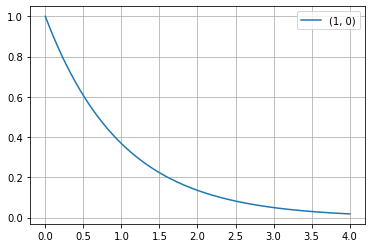

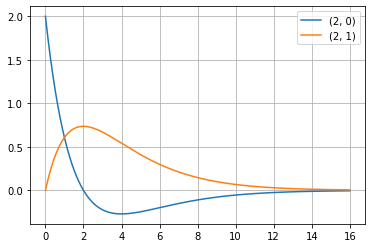

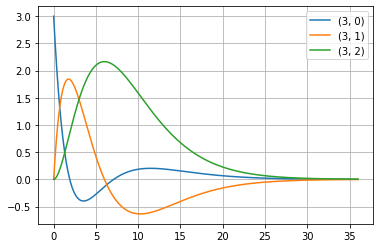

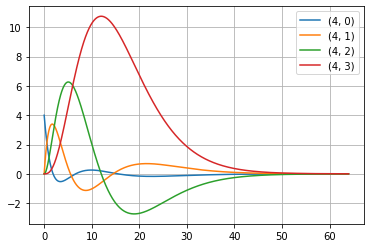

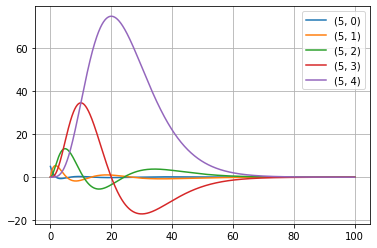

In [82]:
for n in range(1, 5+1):
    fig = plt.figure()
    r = np.linspace(0, (2*n)**2, 1000)
    for l in range(0, n):
        R = hydrogen_radial_part(n, l, r)
        plt.plot(r, R, label=f'({n}, {l})')
        plt.legend()
        plt.grid(True)

In [17]:
(n, l, m) = (3, 2, 1)
# file_name = f'{n}_{l}_{m}.png'
# file_path = Path(save_dir, file_name)
span = (1.5 * n)**2
n_steps = 101
prob_threshold_list = (0.3, 0.5, 0.7)
clip = True
clip_axes = 'xyz'

dx = get_dx(span, n_steps)
dv = dx**3

t0 = time.time()
x, y, z, dv = get_xyz_arrays(span=span, n_steps=n_steps)
t1 = time.time()
print(f'xyz: {t1-t0:.3f}')

r, cos_theta, cos_phi, sin_phi = get_trig_arrays(x, y, z)
t2 = time.time()
print(f'trig: {t2-t1:.3f}')

psi = hydrogen_wavefunction_cartesian(n, l, m,
                                      r, cos_theta, cos_phi, sin_phi,
                                      real_version=False)
t3 = time.time()
print(f'psi: {t3-t2:.3f}')

# prob_array = dv * np.abs(psi)**2
# prob_plot_array = np.mean(dv, axis=None) * np.abs(psi)**2
# prob_threshold_list = array_prob_enclosed_to_prob_value(prob_array, (prob_threshold,))
psi_squared = np.abs(psi)**2
psi_squared_threshold_list = array_prob_enclosed_to_psi_squared_value(psi_squared, dv, prob_threshold_list)
t4 = time.time()
print(f'prob: {t4-t3:.3f}')

color_map = complex_array_to_rgb(psi, mag_maps_to='a')
t5 = time.time()
print(f'rgb: {t5-t4:.3f}')

grid_mesh = pv.RectilinearGrid(x, y, z)
t6 = time.time()
print(f'grid: {t6-t5:.3f}')

grid_mesh['prob'] = psi_squared.ravel(order='F')
grid_mesh['color_map'] = color_map.reshape([psi.size, 4], order='F')
t7 = time.time()
print(f'grid_assign: {t7-t6:.3f}')

clip_mask = get_clip_mask(grid_mesh, clip_axes)
# grid_mesh['prob'][clip_mask] = 0
t8 = time.time()
print(f'clip: {t8-t7:.3f}')

contour_mesh = grid_mesh.contour(psi_squared_threshold_list, 'prob')
t9 = time.time()
print(f'contour: {t9-t8:.3f}')

print(f'total: {t6-t0:.3f}')

plotter = pv.Plotter(notebook=False)

for position in [(2 * span, 0, 0), (0, 2 * span, 0), (0, 0, 2 * span),
                 (-2 * span, 0, 0), (0, -2 * span, 0), (0, 0, -2 * span)]:
    light = pv.Light(position=position, intensity=0.2, positional=False)
    plotter.add_light(light, only_active=True)

plotter.add_mesh(contour_mesh, scalars='color_map', rgb=True,
                 specular=1, style='surface', smooth_shading=False)
plotter.add_text(f'(n, l, m) = ({n}, {l}, {m})', font_size=32)
#             plotter.screenshot(file_path)
plotter.show()

xyz: 0.067
trig: 0.053
psi: 0.160
PROBMAX = 1.0005
prob: 0.265
rgb: 0.462
grid: 0.117
grid_assign: 0.075
clip: 0.157
contour: 0.084
total: 1.124
